In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from helpers import *

In [ ]:
# Loading in data and cleaning up unnecessary columns.
truth_seeker = pd.read_csv("TruthSeeker2023/Features_For_Traditional_ML_Techniques.csv")
truth_seeker = truth_seeker.drop(columns=["Unnamed: 0"])

In [ ]:
# Extracting all features.
truth_seeker_features = truth_seeker.drop(columns=["majority_target", "statement", "BinaryNumTarget", "tweet", "embeddings"])

# Extracting label column for data.
truth_seeker_output = truth_seeker["BinaryNumTarget"]

# Split the data into training and testing sets (e.g., 75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(
    truth_seeker_features,
    truth_seeker_output,
    test_size=0.25,  # Adjust the test_size as needed
    random_state=100  # Set a random seed for reproducibility
)

# Create an instance of the StandardScaler.
scaler = StandardScaler()

# Scale (normalize) the features in the training and testing sets.
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Testing Models

When doing machine learning, one of the most important aspects to consider is what model to fit your data with. A model is the algorithm being used to draw conclusions about the data. In each model, you give it a certain amount of data with the correct answers for the classification (referred to as the training data set) and then give the same model a different set of the same data (referred to as the testing data set) in order to evaluate how well it performs. Each model will have its own advantages and drawbacks depending on its specific methodology and how it interacts with the data. In order to verify the results discussed by Suhaib Kh. Hamed, Mohd Juzaiddin Ab Aziz, and Mohd Ridzwan Yaakub in their paper "A Review of Fake News Detection Models: Highlighting the Factors Affecting Model Performance and the Prominent Techniques Used" I chose to test five different kinds of models with a range of different metrics. In the paper, they talk about both machine-learning based and deep-learning based approaches. Deep-learning approaches focus more on neural networks and attempt to mimic the way the human brain works. For the scope of this project, I chose to only work with machine-learning based models. Additionally this paper did not use the same dataset or specify the features used so I am focusing on exploring the overall trends. Another paper, "The Largest Social Media Ground-Truth Dataset for Real/Fake Content: TruthSeeker" by Sajjad Dadkhah, Xichen Zhang, Alexander Gerald Weismann, Amir Firouzi, and Ali A. Ghorbani, looks at the specific dataset I'm using so I'll be using their results for direct comparisons.

The five models I chose to test are the Decision Tree, Gaussian Naive Bayes, K Nearest Neighbors, Random Forest, and Support Vector classifiers.


### Decision Tree

Decision Trees are one of the most versatile models for text classification. They work by inferring rules from the data features. For example, if we are trying to predict the color of a ball and in the training data it shows that when a ball is thrown more than 50m it's always blue, the decision tree would infer that for any ball that travels more than 50m, its color will be blue. Depending on the number of features given, a decision tree creates a tree-like structure where it makes a decision at each node. For text classification, Decision trees have been used to identify discriminatory language or patterns for sorting texts into categories. Since the essence of fake news detection is sorting texts into a real and a fake category, a Decision Tree is a good model to test. There are a few other advantages to decision trees. They tend to be easier to understand and interpret which sheds more light on the model's process. They are also able to handle non-linear data very well since they don't assume a particular distribution in the data. That being said, when looking at texts with a large number of features such as the Truth Seeker dataset, the model tends to overfit frequently since small changes in the data can lead to completely different tree structures.

### Gaussian Naive Bayes

Gaussian Naive Bayes is a probabilistic model that is an extension of a larger category of models called Naive Bayes models. Naive Bayes (NB) methods are an implementation of the Bayes theorem with the assumption that there is conditional independence between all the features. This means that if the value of one feature changes it won't affect the value of any other features. The most common applications of NB models are in classifying documents, filtering, prediction, etc. So long as the assumption of conditional independence isn't severely violated Gaussian NB is considered a simple but powerful algorithm. It's well suited for larger datasets because its simplicity makes it computationally efficient. However, its simplicity also means that it isn't as effective at identifying complex relationships in the data.

### K Nearest Neighbors

K Nearest Neighbors (KNN) is a nearest neighbors based learning algorithm. This means that this model bases its decision based on the K closest data points. KNN works on the assumption that similar points will be grouped together and can be used for regression or classification problems. KNN is also a non-parametric algorithm which means it's considered good to use when there is an irregular boundary for classification. Non-parametric simply means that it doesn't assume any kind of underlying mathematical model unlike models like linear regression which assumes a linear relationship in the data. KNN stores the training data in its memory rather than going through an actual training period, which makes it easier to implement, but it also means that the majority of computational cost occurs when it is actually making a classification, leading to computational inefficiency and high memory requirements. This is also a model that's very sensitive to noise in the data because it is based on distance and irrelevant features can distort the distance between data points.

### Random Forest

Random Forest (RF) is an ensemble learning method, which means that rather than constructing one model which handles all the data, RF constructs multiple decision trees during its training to create a more robust model. Decision trees in general are known to be prone to overfitting the data and have high variance but RF corrects this in a few different ways. First, the overall model is constructed from many different decision trees which are all trained on different subsets of the training data. Second, RF intentionally adds randomness into its training for this purpose. It does this in two different ways: training on random subsets of features and evaluating multiple splits at every node. By doing these things, RF is able to mitigate the tendency to overfit to individual data points that is often seen with decision trees. This process tends to significantly increase the performance of the model. Since RF is a very robust model it's effective in classifying datasets with a large number of features, which has been particularly useful in this dataset since there are over 50 features. However, the tradeoff of having a large number of trees involved in the algorithm is that it's considered a bit of a "black-box" algorithm and doesn't have the same level of interpretability that an individual decision tree might have, as well as being a more computationally expensive model since it needs to train all of these trees.

### Support Vector

Support Vector Classifiers (SVC) are very powerful classifiers that attempt to identify a hyperplane which sorts the different classes in the data. A hyperplane is essentially a decision boundary where one side of the boundary is in one category and the other is in a different category. An SVC is particularly good at handling a large number of features since its method is to transform data into high-dimensional spaces and search for the decision boundary there. When it comes to giving its decisions, it's quite computationally efficient as it only holds onto a subset of training points. However, its performance is easily affected by the choice of kernel function and the sensitivity to parameter training. This sensitivity means that it's often recommended to scale data so that every feature will play an equal role in decision making rather than a feature that ranges from 0-1000 disproportionately influencing the model compared to a feature that goes from 0-1. It's also another "black-box" model where a user might not be able to understand the decision making process easily.

As part of my control, I chose to use all the default parameters provided by sklearn for each of the models. I also used the same training and testing data for each of the models, with the only exception being that the SVC model had a scaled version of the data instead. I used K-Fold cross validation in order to mitigate the effects of variability in the data. This is a method where the dataset is divided into K number of folds and each fold is used as a testing set once while the remaining data is the training data. I chose 5 for the number of folds to use.

In [ ]:
# Create a list to store evaluation metrics for each model
evaluation_results_data = []

# Initialize models
tree_model = DecisionTreeClassifier()
nb_model = GaussianNB()
knn_model = KNeighborsClassifier()
rf_model = RandomForestClassifier()

models = [tree_model, nb_model, knn_model, rf_model]
model_names = ["Decision Tree", "Naive Bayes", "KNN", "Random Forest"]

# Iterate over models and store evaluation metrics
for model, model_name in zip(models, model_names):
    metrics_data = train_and_evaluate_model(model, X_train, y_train, X_test, y_test)
    evaluation_results_data.append({"model_name": model_name, "metrics_data": metrics_data})

In [ ]:
# Initialize model
svc_model = SVC()

model_names.append("Support Vector Classifier")
models.append(svc_model)

# Testing Support Vector Classifier
svc_metrics = train_and_evaluate_model(svc_model, X_train_scaled, y_train, X_test_scaled, y_test)

# Add SVC results to the list
evaluation_results_data.append({"model_name": "Support Vector Classifier", "metrics_data": svc_metrics})

After initializing all the models I wanted to test, the loop above handles running the testing function on each of the sets and adding all of the metrics to a list to simplify analysis. One thing to note is that the SVC model is not included in the loop. This is due to the scaling mentioned previously so the data inputs are slightly different. The SVC metrics are handled first and added to the list before the loop is run for all of the other models. In terms of evaluation metrics, I looked at the accuracy, F1-score, precision, and recall. These 4 statistics were evaluated both based on the mean of the cross validation trials as well as on a test dataset.

In the "A Review of Fake News Detection Models: Highlighting the Factors Affecting Model Performance and the Prominent Techniques Used" paper, they mentioned using KNN, RF, NB, and SVM. They concluded that of those four RF and SVM had the highest accuracy which is reflected in my results as well. One thing to note is the difference in computational consumption between RF and SVM. While the RF trials would take somewhere between 30 minutes to an hour to run, the SVM trials took well over 4 hours to complete. If I were to make a recommendation, I would argue that the sheer amount of efficiency that RF has in comparison to SVM would make up for any minor differences in accuracy between the two models. The second paper, "The Largest Social Media Ground-Truth Dataset for Real/Fake Content: TruthSeeker", gave a table of the different metrics they got from each model. I'll be primarily focusing on accuracy from this table.

![Model Metrics](model_metrics.png) 

The table doesn't look at an SVM but for the other four I've generally replicated their results. My mean and test accuracies follow the same trend as the paper and for RF, KNN, and the Decision Tree model the accuracies are within a few percentage points. The only one with a significant difference in the Gaussian NB; however, this could be due to the data being imbalanced, as I'll explain in the next section.

After analyzing the rest of the calculated metrics, I chose to draw conclusions about each model instead of comparing just the values of one metric for each of them.

Decision Tree:

This model has an overall moderate performance with the mean statistics all being around 0.6. The test metrics are slightly lower which could indicate some overfitting or variance in the model. A further exploration here could be tuning some of the hyperparameters to handle the potential overfitting.

Gaussian NB:

The NB model shows the lowest performance across the board especially in the mean metrics. In the test metrics, it still shows a generally lower performance but with an unexpected spike in test precision which could mean the data is imbalanced. One way to diagnose this issue would be to check the distribution in the dataset and depending on its results consider adjusting the sample by oversampling the minority or adjusting weightage during training.

KNN:

The KNN, similarly to the Decision Tree, shows moderate performance with the mean metrics all being around 0.6. The test metrics are very similar to the mean metrics showing an overall very stable performance.

RF:

The RF model gives one of the best performances amongst these models with higher mean metrics. The test set metrics are also high meaning that the model generalized well.

SVM:

The SVM model and RF model have very similar statistics so everything said about the RF model applies here as well. However, the SVM took significantly longer compared to the RF for almost the exact same performance.

In summary, the RF model performs the best overall, while the Gaussian NB model has the lowest performance. RF and SVM perform the best among all the tested models, which validates the results of both papers. The other models show similar performances to the statistics given in the second paper and range in their precision, recall, and overall accuracy.


Below is code for seeing all the metrics in table form as well as plots to compare them.

In [36]:
# Print metrics as a table
print("{:<20}".format("Model"), end="")
for metric_name in ["Mean Accuracy", "Mean Precision", "Mean Recall", "Mean F1 Score", "Test Accuracy", "Test Precision", "Test Recall", "Test F1 Score"]:
    print("{:<15}".format(metric_name), end="")
print()  # Newline

for row in evaluation_results_data:
    model_name = row["model_name"]
    metrics_values = [row["metrics_data"][metric] for metric in ["Mean Accuracy", "Mean Precision", "Mean Recall", "Mean F1 Score", "Test Accuracy", "Test Precision", "Test Recall", "Test F1 Score"]]

    print("{:<20}".format(model_name), end="")
    for value in metrics_values:
        print("{:<15.4f}".format(value), end="")
    print()  # Newline

Model               Mean Accuracy  Mean Precision Mean Recall    Mean F1 Score  Test Accuracy  Test Precision Test Recall    Test F1 Score  
Decision Tree       0.5985         0.6095         0.6074         0.6082         0.5979         0.6072         0.6096         0.6084         
Naive Bayes         0.5265         0.5817         0.5383         0.4522         0.5339         0.9452         0.5261         0.6760         
KNN                 0.5915         0.6017         0.6045         0.6030         0.5939         0.6066         0.6049         0.6058         
Random Forest       0.6902         0.7059         0.6791         0.6909         0.6890         0.6733         0.7078         0.6901         
Support Vector Classifier0.6893         0.7074         0.6734         0.6900         0.6853         0.6662         0.7055         0.6853         


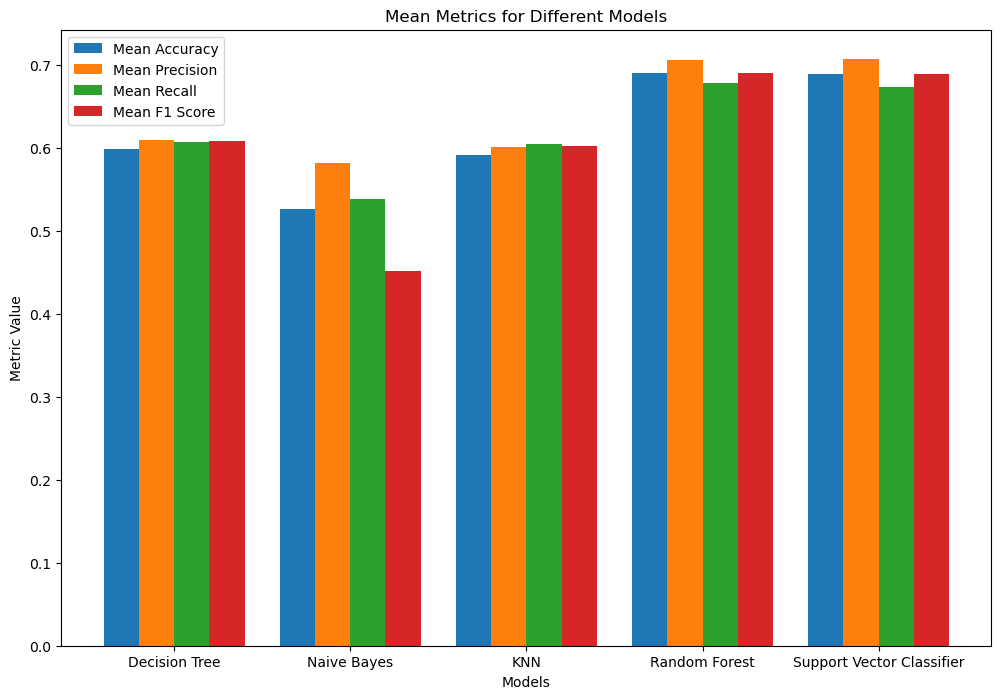

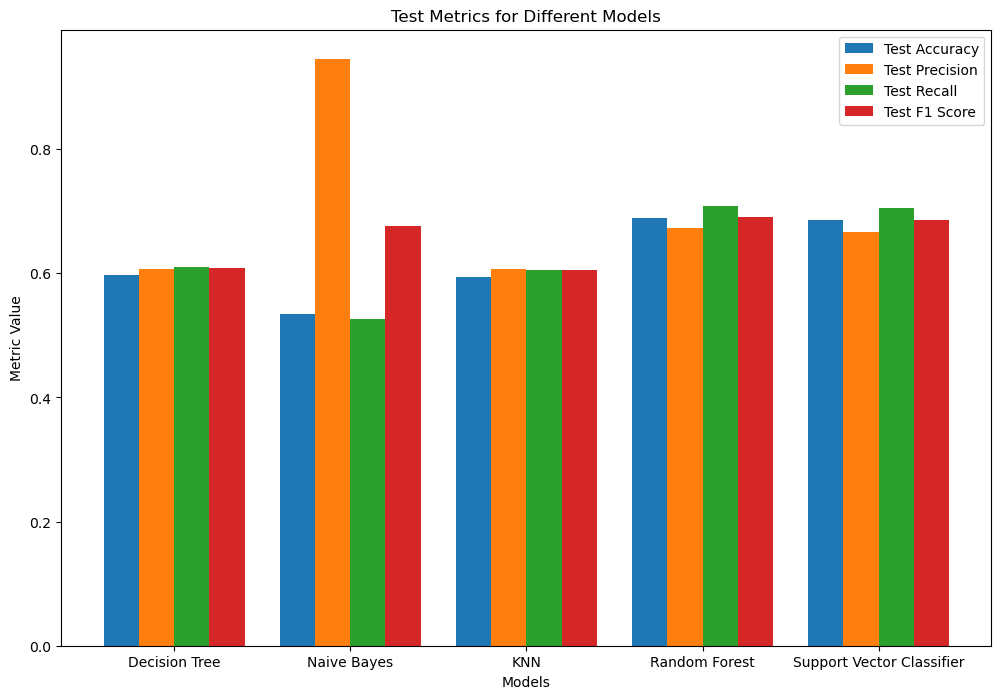

In [37]:
# Define the metric categories
mean_metrics = ["Mean Accuracy", "Mean Precision", "Mean Recall", "Mean F1 Score"]
test_metrics = ["Test Accuracy", "Test Precision", "Test Recall", "Test F1 Score"]

# Set the width of the bars
bar_width = 0.2

for metric_category, metrics_list in zip(["Mean Metrics", "Test Metrics"], [mean_metrics, test_metrics]):
    # Create a new subplot for each metric category
    fig, ax = plt.subplots(figsize=(12, 8))

    # Iterate over metric names and create a group of bars for each metric
    for i, metric_name in enumerate(metrics_list):
        # Extract metric values for each model
        metric_values = {row["model_name"]: row["metrics_data"][metric_name] for row in evaluation_results_data}

        # Bar plot for each metric
        ax.bar(
            x=np.arange(len(model_names)) + i * bar_width,
            height=[metric_values[model_name] for model_name in model_names],  # Use 'model_names' here
            width=bar_width,
            label=metric_name  # Include metric name in the legend
        )

    # Set labels and title for each plot
    ax.set_xticks(np.arange(len(model_names)) + (len(metrics_list) - 1) * bar_width / 2)
    ax.set_xticklabels(model_names)  # Use 'model_names' here
    ax.set_xlabel('Models')
    ax.set_ylabel('Metric Value')
    ax.set_title(f'{metric_category} for Different Models')
    ax.legend()  # Show legend for metric names

    # Show the plot
    plt.show()

Another aspect I was interested in exploring was how to determine where a model fails. Sometimes there will be a pattern to when a model returns a false positive or negative and knowing that information can help fine-tune an algorithm. I decided to attempt to do this by hand by examining when the model returned incorrectly and the features associated to see if I was able to find a common error between the data points. While I have some starter code for it which does print out all of the information needed to do this analysis, I wasn't able to actually draw any conclusions on it due to the sheer amount of data and features. This is likely not the best way to look for these error patterns so a future exploration could be looking more into the best way to parse through this data. A first step would be to finetune the overall model first so that it would be using a few less features.

In [ ]:
# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Identify indices of false positives and false negatives in the predictions
false_positive_indices = np.where((y_pred == 1) & (y_test == 0))[0]
false_negative_indices = np.where((y_pred == 0) & (y_test == 1))[0]

# Create DataFrames to store false positive and false negative examples
false_positive_df = pd.DataFrame(columns=["Example", "Predicted", "Actual", "Features"])
false_negative_df = pd.DataFrame(columns=["Example", "Predicted", "Actual", "Features"])

# Adding features for false positives in DataFrame
for idx in false_positive_indices:
    if 0 <= idx < len(X_test):
        false_positive_df = pd.concat([false_positive_df, pd.DataFrame({
            "Example": [f"False Positive Example {idx}"],
            "Predicted": [y_pred[idx]],
            "Actual": [y_test.iloc[idx]],
            "Features": [str(X_test.iloc[idx])]
        })], ignore_index=True)

# Adding features for false negatives in DataFrame
for idx in false_negative_indices:
    if 0 <= idx < len(X_test):
        false_negative_df = pd.concat([false_negative_df, pd.DataFrame({
            "Example": [f"False Negative Example {idx}"],
            "Predicted": [y_pred[idx]],
            "Actual": [y_test.iloc[idx]],
            "Features": [str(X_test.iloc[idx])]
        })], ignore_index=True)

# Display false positive DataFrame
print("\nFalse Positives:")
print(false_positive_df)

# Display false negative DataFrame
print("\nFalse Negatives:")
print(false_negative_df)